<font style='font-size:3em'>**📝 Week 5 Summative Assessment** </font>

## DS105A – Data for Data Science

**PURPOSE**: The purpose of this Jupyter Notebook is to document my answers to the DS105 W5 Summative assessment, show the steps I took and explain the rationale behind these decisions. It will also include some additional, relevant insights into the data itself.

**CLICK THE IMAGE BELOW TO VIEW THE WEBSITE THAT WAS SCRAPED FOR THIS PROJECT:**

<a href="https://socialdatascience.network/index.html#intro">
    <img src="https://hertieschool-f4e6.kxcdn.com/fileadmin/_processed_/7/b/csm_2022_CIVICA_Website_white_180x90_f9be83fbe7.png" alt="Civica logo" width="25%">
</a>

**LAST REVISION:** 30th October 2023

<div style="width:70%;border: 1px solid #aaa; border-radius:1em; padding: 1em; margin: 1em 0;">

**(Jon's comments)**

Notice how well organise this notebook is! It even has pictures. It's easy to read and follow. It's also easy to see what the author has done and why. This is a great example of how to present your work.

Another way to have a sense for what is in a notebook is by clicking on the **Outline** button above, while the notebook is open in VS Code. This will show you all the headings in the notebook. You can then click on a heading to jump to that section of the notebook.

</div>

--- 
## ⚙️ Setting Up

### Packages Downloaded and Updates Made

- The following commands were run from the terminal within VS Code:

    ```console
    pip install pandas
    pip install requests
    sudo pip3 install requests
    pip3 install --upgrade pip
    pip install scrapy
    sudo pip3 install scrapy
    pip install ordered-set
    pip install selenium
    pip install nltk
    pip install certifi
    pip install matplotlib
    pip install plotly
    pip install --upgrade nbformat
    pip install gensim
    pip install --upgrade gensim
    pip install inflect
    ```

<div style="width:70%;border: 1px solid #aaa; border-radius:1em; padding: 1em; margin: 1em 0;">

**(Jon's comments)**

This is a fantastic great practice! I know exactly what I need to type on the Terminal to get the same packages they used in the submission

</div>

### Importing Installed Packages

- The below chunk of code was run to import the installed packages
- Python 3.11.5 is being used

In [21]:
import requests            
import pandas as pd        
from pprint import pprint    
from scrapy import Selector  
from ordered_set import OrderedSet  
from collections import Counter
import nltk
from nltk.corpus import stopwords
import certifi
import os
from datetime import datetime

<div style="width:70%;border: 1px solid #aaa; border-radius:1em; padding: 1em; margin: 1em 0;">

**(Jon's comments)**

- This person discovered these very useful Python packages (`ordered_set` and `collections`). It is not clear if those were discovered with the help of generative AI (they should have ellaborated a bit more on this at the end), but they used it well.

-  This person used other Python packages useful for text mining analysis (!) This made us go WOW! We weren't expecting any deep analysis this early in the course.

</div>

### Folders Created
- `Data` folder is created using a relative path (so that my username/name isn't given away by the path)
- This contains `Schedule.CSV` (from Part 1 of the Summative) and `Agenda.CSV` (from Part 2 of the Summative), these files are both saved directly to the `Data` Folder
- An `if` statement is used so that multiple `Data` folders are not generated, and whenever this Jupyter Notebook is ran the new `agenda.csv` and `schedule.csv` will replace the old version within the `Data` folder

In [22]:
import os

# Get the current working directory (where your Python script is located)
current_directory = os.getcwd()

# Specify the name of your new folder
folder_name = 'Data'

# Construct the relative path to the new folder
data_folder_path = os.path.join(current_directory, folder_name)

# Check if the folder doesn't exist already, then create it
if not os.path.exists(data_folder_path):
    os.makedirs(data_folder_path)
    print(f"Folder '{folder_name}' created successfully in the current directory.")
else:
    print(f"Folder '{folder_name}' already exists in the current directory.")

Folder 'Data' already exists in the current directory.


<div style="width:70%;border: 1px solid #aaa; border-radius:1em; padding: 1em; margin: 1em 0;">

**(Jon's comments)**

This is great! They found a way to make this replicable and reproducible. The [`os` library](https://docs.python.org/3/library/os.html), from the standard Python library, is used to create a folder and save the files there, emulating what one would do in the Terminal. This is a very good practice.

If you aren't familiar with the `os` library, you could have achieved similar greatness by adding a markdown cell with instructions: 

> Go to the Terminal and type the following before running the rest of this notebook
>
> ```console
> mkdir Data
> ```
>


</div>

--- 
## 🔐 Requesting a Web Page

### Requesting the Website and using a Selector

- We store the URL of the target website, send a GET request to the specified URL and store the server's response
- We then create a Scrapy Selector object which allows us to apply CSS selectors to extract specific data from the HTML code

In [23]:
# This is the address of the website we want to scrape
my_url = 'https://socialdatascience.network/index.html#schedule'

# We set a GET request to the website
response = requests.get(my_url)

# Parse the HTML code using Scrapy Selector
sel = Selector(text=response.text)

--- 
## 🔍 Part 1: Scraping for titles, speakers, dates and links to CIVICA Seminar Schedule

### Scrape the **names of all the events** and save them to a list

- All event titles are represented within a `<h6 class="card-title">` tag (found by inspecting the page)
- Therefore: `h6.card-title` is a good CSS Selector to use

In [24]:
# Saving all the event titles as a list
titles = sel.css('h6.card-title ::text').getall()

### Scrape the **links to all the events** and save them to a list

- From inspecting the page we can see that all event links are under the attribute `href` and are represented within `<div class="card-body">`
- Therefore: `div.card-body a ::attr(href)` is a good selector to use
- The generated list has duplicates, so to remove these I used an ordered set (a normal set would have changed the order of the links leading to mismatched data in the final table). Although I considered using a for loop to remove duplicates, I found that the ordered set was much simpler
- I also added the prefix of "https://socialdatascience.network/" to all the links to make them full links instead of partial

In [25]:
# Saving all the links to events as a list
from ordered_set import OrderedSet
partial_links = OrderedSet(sel.css('div.card-body a ::attr(href)').getall())

# Adding a prefix to all the links in the list
address = "https://socialdatascience.network/"                             
links = []
for partial_link in partial_links:
    full_link = address + partial_link
    links.append(full_link)

<div style="width:80%;border: 1px solid #aaa; border-radius:1em; padding: 1em; margin: 1em 0;">

**(Jon's comments)**

Their solution is elegant in its use of the `ordered_set` package to remove duplicated entries. If you were dealing with thousand, or millions, of entries, this would be a very efficient way to remove duplicates.

But even without knowledge of this package, you could have achieved the same result by using a regular, slightly less efficient, Python `set` data structure. A concise alternative to the chunk above would be to use list comprehension:

```python
partial_links = set(sel.css('div.card-body a ::attr(href)').getall())
links = [address+partial_link for partial_link in partial_links]
```

</div>

### Scrape the **names of all the speakers** and **dates of all the events** and save them to seperate lists

- All speakers names are represented within a `<p class="card-text">` tag which would be our ideal CSS selector
- However, both the speaker name and date are contained within this, separated by a `<br>`
- We can separate the speaker name from the date of the event using a for loop, and ammend different lists to keep the names and dates in separate lists

In [26]:
speakers = []
dates = []

for i in sel.css('div.card-body p ::text').getall():
    i = i.lstrip()
    if i.startswith('Speaker:'):
        speaker_name = i.replace('Speaker: ', '')
        speakers.append(speaker_name)
    elif i.startswith('Date:'):
        date = i.replace('Date: ', '')
        dates.append(date)
    else:
        speakers.append('')

### Convert the lists to a **pandas data frame** and save it to a **CSV file**

- Note: In order to use the `pd.DataFrame()` function to create a data frame all the lists/arrays must be the same length. This was checked using `if` statement
- The final CSV file (schedule.csv) is saved directly to the data folder creating in the Setting Up stage
- The final CSV file (schedule.csv) can be viewed as a table
- If an event has no speakers, then the relevant cell of the table will be left empty

In [27]:
# Check if length of lists are the same
if len(titles) == len(speakers) == len(dates) == len(links):
    print("All lists are same length")
else:
    print("Lists are not same length, please ammend")

# Specify the file path including the data folder to save the schedule.csv file
schedule_csv_file_path = os.path.join(data_folder_path, 'schedule.csv')

# Use the `pd.DataFrame()` function to create a data frame + Save pandas data frame df to a CSV file.
df_schedule = pd.DataFrame({'title': titles, 'speaker': speakers, 'date': dates, 'link': links})
df_schedule.to_csv(schedule_csv_file_path, index=False)

# Double-check that the CSV file was created correctly by opening it using pandas
df_schedule = pd.read_csv(schedule_csv_file_path)
df_schedule

All lists are same length


title  \
0   Promoting the systematic use of real-world dat...   
1   Data science for the Sustainable Development G...   
2   CentralBankRoBERTa: A Fine-Tuned Large Languag...   
3   The Evolution of the Climate Discourse on Twit...   
4   The Handbook of Computational Social Science f...   
5   Artificial Intelligence, Algorithmic Recommend...   
6   Exploring A New Model of Industry/Academic Col...   
7   Using Multimodal Neural Networks to Better Und...   
8   Models, mathematics, and data science: how to ...   
9          CIVICA Conference on European Polarisation   
10              New Faces of Bias in Online Platforms   
11  Introducing the Online Harms Observatory: AI p...   
12  Using Open Source Data Streams and Surveys to ...   
13  Does Epistemic Vice Explain Corporate Misconduct?   
14  Becoming a data scientist: what it means to pu...   
15            The Making of a French Migration Crisis   
16  A New Approach to Visualizing Spatial Exposure...   
17  Modeling Sustainable Development from the Bott...   
18  Internet Communities and the French Presidenti...   
19  The Science of Success: Quantifying Outcomes i...   
20  Embedding Regression: Models for Context-Speci...   
21  Information and Irregular Migration: Evidence ...   
22       Adjusting for Confounding with Text Matching   
23                             What is Data Feminist?   
24              The Principles of Collective Learning   
25  More Than Words: How Political Rhetoric Shapes...   
26  Serendipity or Confinement? Deconstructing Alg...   
27  Framing a Protest: Determinants and Effects of...   
28             Understanding Beautiful Places with AI   
29         Incentives and Covid-19 Vaccination Uptake   
30                    The Art of Quantitative Editing   
31                    Breaking the Social Media Prism   
32  Using Public Video Cameras to Detect Racial Di...   
33       How to Detect Fake News Before It Is Written   
34  Negotiating with AI: Fairness in the Labor Market   
35         Tracking Covid-19 with the Financial Times   
36  Police Diversity to Prevent Violence: Does It ...   
37  Data Science in the Time of Covid and What Hap...   

                                      speaker                           date  \
0                  Dr. Divya Srivastava, LSE     Wednesday, 22 November 2023   
1                    Prof. Elisa Omodei, CEU      Wednesday, 18 October 2023   
2    Moritz Pfeifer & Vincent Philipp Marohl    Wednesday, 27 September 2023   
3                         Dr. Max Falkenberg    Wednesday, 13 September 2023   
4                       Dr. Eleonora Bertoni          Wednesday, 31 May 2023   
5                    Prof. Giacomo Calzolari          Wednesday, 03 May 2023   
6                        Prof. Pablo Barberá        Wednesday, 19 April 2023   
7                Prof. Bryce Jensen Dietrich        Wednesday, 22 March 2023   
8                         Dr. Erica Thompson        Wednesday, 08 March 2023   
9                                         NaN    Wednesday, 15 February 2023   
10                        Prof. Aniko Hannak     Wednesday, 08 February 2023   
11                             Pica Johnsson      Wednesday, 11 January 2023   
12                          Prof. Lisa Singh     Wednesday, 02 November 2022   
13                           Dr. Marco Meyer      Wednesday, 19 October 2022   
14                       Prof. Anne Beaulieu    Wednesday, 14 September 2022   
15  Dr. Michelle Reddy & Dr. Hélène Thiollet         Wednesday, 15 June 2022   
16                   Prof. Stephanie Lackner         Wednesday, 01 June 2022   
17                      Dr. Omar A. Guerrero          Wednesday, 04 May 2022   
18                   Prof. David Chavalarias        Wednesday, 20 April 2022   
19                     Prof. Laszlo Barabasi        Wednesday, 09 March 2022   
20                     Prof. Arthur Spirling     Wednesday, 23 February 2022   
21                      Dr. Alexandra Scacco     Wednesday, 09 F

--- 
## 📆 Part 2: Scraping for talk links, titles, speakers and descriptions from CIVICA agendas


### Scrape the **titles, speakers and descriptions of talks** and save them to a list (using df_schedule as reference)

The agenda/talks for each event are found on the individual event page. A `for` loop is used to go through each event link and scrape the relevant data

<u>Talk Titles</u>
+ All individual talk titles are represented within a `<h4>` tag under a `<div class="row schedule-item">` (found by inspecting the event page)
+ However, this also includes the name of the assigned speaker for the talk within a further `<span>` tag (we do not want to include this)
+ Therefore: `'div.row.schedule-item h4:not(:has(span))::text'` is a good CSS Selector to use as it included the title of the talk but excludes the name of the speaker


<u>Talk Speakers</u>
+ All talk speakers are represented within a `<span>` tag under a `<h4>` tag under `<div class="row schedule-item">` (found by inspecting the event page)
+ Therefore: `'div.row.schedule-item h4 span ::text'` is a good CSS Selector to use as it includes the name of the speaker but excludes other information under the `<h4>` tag like title of the talk


<u>Talk Descriptions</u>
+ All talk descriptions are represented within a `<p>` tag under `<div class="row schedule-item">` (found by inspecting the event page)
+ Therefore: `'div.row.schedule-item p'` is a good CSS Selector to use

In [28]:
talk_title = []
talk_speaker = []
talk_description = []

# For loop to go through each event link using the existing event links column from Part 1 df_schedule dataframe
for i in range(len(links)):
    url = links[i]
    response = requests.get(url)
    sel = Selector(text=response.text)

    # Getting all the talk titles and excluding the names of the talk speakers
    event_agenda = sel.css('div.row.schedule-item h4:not(:has(span))::text').getall()
    talk_title.append(event_agenda)

    # Getting all the talk speakers
    event_speaker = sel.css('div.row.schedule-item h4 span ::text').getall()
    talk_speaker.append(event_speaker)

    # Getting all the talk descriptions
    event_description = sel.css('div.row.schedule-item p').getall()
    talk_description.append(event_description)

<div style="width:70%;border: 1px solid #aaa; border-radius:1em; padding: 1em; margin: 1em 0;">

**(Jon's comments)**

The only thing lending this solution down is that this for loop could have been a function!

</div>

### Flattening/Ammending lists for links, titles, speakers and descriptions of talks 

- In order to use the `pd.DataFrame()` function to create a data frame all the lists/arrays must be the same length
- The below code goes through each nested list and either flattens it out or ammends it such that all 4 lists are the same length
- In the case of final_talk_description, we also clean up the data to remove unecessary tags

### List for Titles

In [29]:
# Turning the nested title list into a flat list (same will be done with other lists to ensure everything is same length)
final_talk_title = [item for sublist in talk_title for item in sublist]

<div style="width:70%;border: 1px solid #aaa; border-radius:1em; padding: 1em; margin: 1em 0;">

**(Jon's comments)**

Great use of list comprehension to 'flatten out' a nested list

</div>

### List for Speakers

In [30]:
# Ensuring the final speaker list corresponds with the final talk titles list
final_talk_speaker = []
for counter in range(len(talk_title)):
    for i in range(len(talk_title[counter])):
        if i < len(talk_speaker[counter]):
            final_talk_speaker.append(talk_speaker[counter][i])
        #If the talk doesn't have a speaker then this will be left blank eg. most 'Announcement' talks do not have an assigned speaker
        else:
            final_talk_speaker.append('')

### List for Descriptions

In [31]:
# If 'div.row.schedule-item p ::text' was used then the description was split into separate descriptions if there was additional text inside <b>
# To avoid this problem, '::text' was left out, and instead the now included <p> and <b> tags were removed using a for loop
for i in range(len(talk_description)):
    for j in range(len(talk_description[i])):
        # Remove <p> and <b> tags using string.replace()
        talk_description[i][j] = talk_description[i][j].replace("<p>", "").replace("</p>", "").replace("<b>", "").replace("</b>", "").replace("amp;", "")
# Turning the nested list into a flat list (same will be done with other lists to ensure everything is same length)
final_talk_descriptions = [item for sublist in talk_description for item in sublist]

### List for Links

In [32]:
# Currently the list of links will not match the parallel list for individual talks, so this is ammended below
final_links = []
for counter in range(len(talk_title)):
    for i in range(len(talk_title[counter])):
        final_links.append(links[counter])            

### Convert the lists to a **pandas data frame** and save it to a **CSV file**

- Note: In order to use the `pd.DataFrame()` function to create a data frame all the lists/arrays must be the same length. This was checked using `if` statement
- The final CSV file (agenda.csv) is saved directly to the data folder creating in the Setting Up stage
- The final CSV file (agenda.csv) can be viewed as a table
- If an event has no speakers, then the relevant cell of the table will be left empty

In [33]:
# Check if length of lists are the same
if len(final_links) == len(final_talk_descriptions) == len(final_talk_speaker) == len(final_talk_title):
    print("All lists are same length")
else:
    print("Lists are not same length, please ammend")

# Specify the file path including the data folder to save the agenda.csv file
csv_file_path = os.path.join(data_folder_path, 'agenda.csv')

# Use the `pd.DataFrame()` function to create a data frame + Save pandas data frame df to a CSV file.
df_agenda = pd.DataFrame({'event_link': final_links, 'talk_title': final_talk_title, 'talk_speakers': final_talk_speaker, 'talk_description': final_talk_descriptions})
df_agenda.to_csv(csv_file_path, index=False)

# Double-check that the CSV file was created correctly by opening it using pandas
df_agenda = pd.read_csv(csv_file_path)
df_agenda

All lists are same length


event_link  \
0    https://socialdatascience.network/fall2023/ses...   
1    https://socialdatascience.network/fall2023/ses...   
2    https://socialdatascience.network/fall2023/ses...   
3    https://socialdatascience.network/fall2023/ses...   
4    https://socialdatascience.network/fall2023/ses...   
..                                                 ...   
146       https://socialdatascience.network/sess2.html   
147      https://socialdatascience.network/launch.html   
148      https://socialdatascience.network/launch.html   
149      https://socialdatascience.network/launch.html   
150      https://socialdatascience.network/launch.html   

                  talk_title  \
0      Welcome Introduction    
1           Seminar Session    
2      Research Discussion.    
3              Announcement    
4      Welcome Introduction    
..                       ...   
146            Announcement    
147    Welcome Introduction    
148     Institutional Update   
149  Round Table Discussion    
150                 Closing    

                                         talk_speakers  \
0                               Dr. Ghita Berrada, LSE   
1                            Dr. Divya Srivastava, LSE   
2                                     Lead Institution   
3                                                  NaN   
4                               Prof. Petra Novak, CEU   
..                                                 ...   
146                                                NaN   
147  Prof. Slava Jankin, Hertie School Data Science...   
148  Chair: Prof. Kenneth Benoit, LSE Data Science ...   
149     Dr. Erica Thompson, LSE Data Science Institute   
150                                                NaN   

                                      talk_description  
0    Setting the scene: Brief intro to the speaker ...  
1    Promoting the systematic use of real-world dat...  
2                    Q&A / Discussion on the research   
3    Upcoming seminar in the series and other annou...  
4    Setting the scene: Brief intro to the speaker ...  
..                                                 ...  
146  Upcoming seminar in the series and other annou...  
147  Setting the scene: Context and Goals for the C...  
148  Introducing CIVICA Partner Institutions' Direc...  
149  Topic: Data Science and Digital Transformation...  
150                                    Closing remarks  

[151 rows x 4 columns]

<div style="width:70%;border: 1px solid #aaa; border-radius:1em; padding: 1em; margin: 1em 0;">

**(Jon's comments)**

The remaining of this notebook is very impressive and 🆒. It shows initiative, creativity and it is insightful. It is also very well documented, we know exactly what is going on.

</div>

--- 
## 💡 Additional Insights into this information

### I will be looking at the following insights about the data from the CIVICA Seminar Website

**1. 📖 Natural Language Analysis of Topics of Events (to determine what kinds of events are most common)**

**2. 🗣️ Frequency of different speakers**

**3. 📈 Frequency of CIVICA seminar events per quarter**

--- 
### 📖 Natural Language Toolkit and Analysis of Most Popular Topics for CIVICA Data Science Seminar Events

- I thought that it would be very interesting to see what the most popular topics/points of dicussion for events and talks were
- I realised that I could explore this via NLTK (Natural language toolkit)
- 'Stop words' like 'The', 'And', 'To' etc. will be filtered out, leaving us only with words that could potentially give us an indication into the most popular topics for events to be held about. Some custom words were added to the list of 'Stop Words' if they appeared in every description eg. "Q&A, and the first few words were not included in the graph as they consisted of very common words like "Data" which gives us little new insight (given that this is a seminar series about data, obviously Data will be the most common word)
- The most popular words in event titles and talk descriptions will be outputted in the form of a bar chart for easy visual digestion
- Key insights and takeaways from the output are included below the bar chart

In [34]:
import nltk
from nltk.corpus import stopwords
import certifi
import os

# Set the SSL_CERT_FILE environment variable to the path of the updated certificates bundle
os.environ['SSL_CERT_FILE'] = certifi.where()
# Download the stopwords dataset (only required once)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/jon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from collections import Counter

# List of words
title_words_list = [word for titles in titles for word in titles.split()]
description_words_list = [word for final_talk_descriptions in final_talk_descriptions for word in final_talk_descriptions.split()]

event_overview = []
# For loop to go through each event link using the existing event links column from Part 1 df_schedule dataframe
for i in range(len(links)):
    url = links[i]
    response = requests.get(url)
    sel = Selector(text=response.text)

    # Getting all the talk titles and excluding the names of the talk speakers
    overview = sel.css('div.col-lg-9.fade.show.active p::text').getall()
    event_overview.extend(overview)


event_overview_list = [word for event_overview in event_overview for word in event_overview.split()]

combined_words_list = title_words_list + description_words_list + event_overview_list

# Get the list of English stopwords from nltk
stop_words = set(stopwords.words('english'))

# Additional words to be added to stop_words
custom_stop_words = ['us', 'Setting', 'scene:', 'University', 'Professor', 'also', 'session', 'policy.', 'social,', 'ten', 'Hertie', 'Series,', 'sciences,', 'Hertie', 'School', 'Professor', '.', 'political,']  # Add your custom stop words here

# Extend the stop_words set with custom_stop_words
stop_words.update(custom_stop_words)

# Remove stopwords from the list of words
filtered_words_list = [word for word in combined_words_list if word.lower() not in stop_words]

# Count the filtered words
filtered_counted_words = Counter(filtered_words_list)

items_list = []
frequencies_list = []

# Iterate through counted items and frequencies
for item, frequency in filtered_counted_words.most_common()[18:46]:
    items_list.append(item)
    frequencies_list.append(frequency)

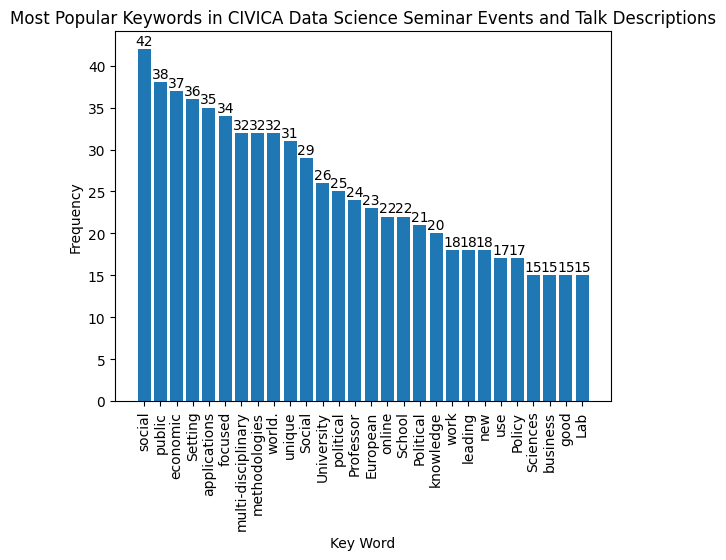

In [36]:
import matplotlib.pyplot as plt

# Sample data
items_list
frequencies_list

# Create a bar chart
plt.bar(items_list, frequencies_list)

# Adding labels and title
plt.xlabel('Key Word')
plt.ylabel('Frequency')
plt.title('Most Popular Keywords in CIVICA Data Science Seminar Events and Talk Descriptions')

# Display the frequency of each bar above the bars
for i, freq in enumerate(frequencies_list):
    plt.text(i, freq + 0.5, str(freq), ha='center')

# Rotate x-axis labels sideways
plt.xticks(rotation='vertical')

# Display the graph
plt.show()

### 📖 Takeaways from Natural Language Analysis of Topics and Descriptions

- From the bar chart we can see that the seminars tend to focus a lot on uses of AI/Data Science (high frequency of "applications", "methodologies", "use")
- There is a heavy emphasis on the "social", "public" and "economic" aspects on uses of AI and Data Science
- The lack of technical jargon in the event descriptions and titles shows that these talks will be accessible to the general public/to audiences that do not have existing knowledge of data science concepts (This is a good thing in my opinion! As it means that the CIVICA events are accessible to a larger group of people!)
- The fact that "World" appears more times than "European" might indicate that despite CIVICA being a european based organisation, their world is applicable to a broader scope/to the entire world (not just focussing on europe)
- The high frequency of worlds like "multi-disciplinary", "unique", "leading" and "new" potentially indicates that the CIVICA seminar series is good at staying ahead of the data science curve, and that we have been successful at bringing in speakers that are at the cutting edge of the field (or maybe the descriptions are just written in such a way to bring in more interest to the events).

--- 
### 🗣️ Seeing who the most common event speakers and talk speakers are across all events

- I thought it would be interesting to see who the most frequent speakers at all the CIVICA events are (as both main speakers and assigned speakers for individual talks within events)
- If there are any speakers who have spoken a lot, then CIVICA might make note to not bring them in for future events and to maybe bring in a different speaker to allow for more variety (alternatively, they might also want to give an acknowledgement to any speaker that has spoken lots at events!)
- A bar chart has been generated to visualise this information, and the code has been written such that events with no speaker will be shown as "no assigned speaker" as opposed to just showing a blank space

In [37]:
from collections import Counter

# List of all speakers
all_speakers = final_talk_speaker + speakers
counted_speakers = Counter(all_speakers)

speaker_list = []
occurence_list = []

# Iterate through counted items and frequencies
for item, frequency in counted_speakers.most_common(10):
    if item=="":
        speaker_list.append("No Assigned Speaker")
        occurence_list.append(frequency)
    else:
        speaker_list.append(item)
        occurence_list.append(frequency)

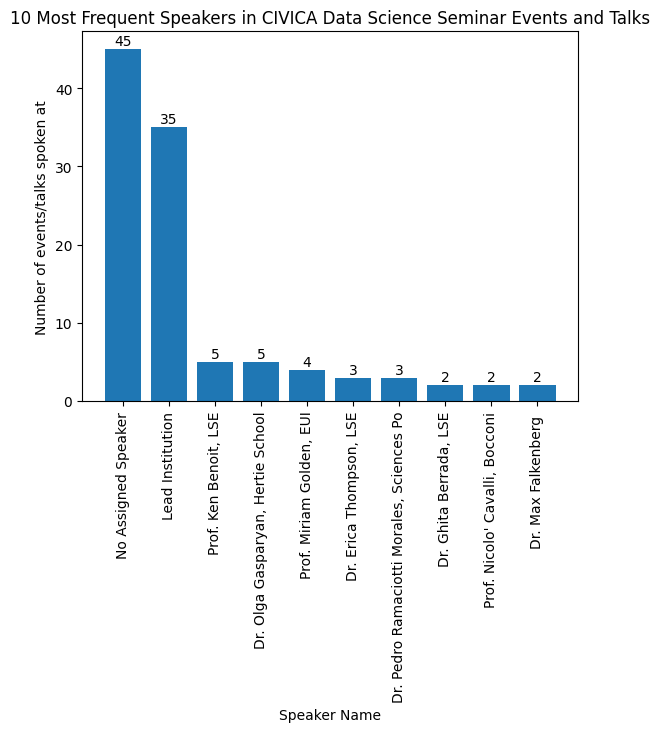

In [38]:
import matplotlib.pyplot as plt

# Sample data
speaker_list
occurence_list

# Create a bar chart
plt.bar(speaker_list, occurence_list)

# Adding labels and title
plt.xlabel('Speaker Name')
plt.ylabel('Number of events/talks spoken at')
plt.title('10 Most Frequent Speakers in CIVICA Data Science Seminar Events and Talks')

# Display the frequency of each bar above the bars
for i, freq in enumerate(occurence_list):
    plt.text(i, freq + 0.5, str(freq), ha='center')

# Rotate x-axis labels sideways
plt.xticks(rotation='vertical')

# Display the graph
plt.show()

### 🗣️ Takeaways from analysis of frequency of speakers

- From the bar chart we can see that many talks have no assigned speaker or are broadly facilitated by the lead institution
- There are no single speakers that have spoken at an incredibly high number of events or talks, indicating that CIVICA seminar series is good at bringing in a variety of speakers (which is good for marketing, as we are always doing new things and not relying on a select froup of speakers)

--- 
### 📈 Seeing how the frequency of events has moved over time

- I thought it would be interesting to get an overview of how many CIVICA seminar events are held each quarter to see how consistent these events are
- eg. are we gradually holding more or less events, is there significant fluctuation? etc
- I used datetime to achieve the final graph, and used nested loops to count the dates into the correct quarters

In [39]:
from datetime import datetime

# Sample list of dates (in string format)
formatted_dates = [string.replace(",", "") for string in dates]

# Initialize quarter and count lists
quarters = []
counts = []

# Initialize quarter and count dictionary
quarter_counts = {}

# Iterate through the dates and count quarters for each year
for date_str in formatted_dates:
    # Convert string to datetime object using the appropriate format
    date_obj = datetime.strptime(date_str, "%A %d %B %Y")
    year = date_obj.year
    # Filter dates for 2021, 2022, and 2023
    if 2021 <= year <= 2023:
        quarter = (date_obj.month - 1) // 3 + 1
        # Update quarter count in the dictionary
        key = f"Q{quarter} {year}"
        quarter_counts[key] = quarter_counts.get(key, 0) + 1

# Extract quarters and counts into separate lists
for quarter, count in quarter_counts.items():
    quarters.append(quarter)
    counts.append(count)

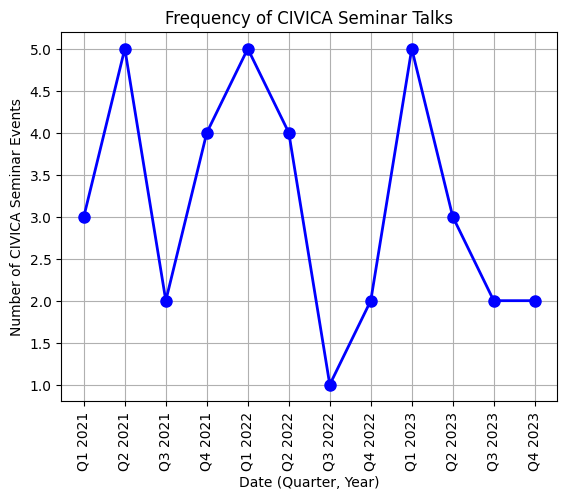

In [40]:
import matplotlib.pyplot as plt

# Sample data
x = quarters
y = counts

# Reverse the x and y list to display the axis in reverse order
x.reverse()
y.reverse()

# Create a line graph
plt.plot(x, y, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xticks(rotation='vertical')

# Adding labels and title
plt.xlabel('Date (Quarter, Year)')
plt.ylabel('Number of CIVICA Seminar Events')
plt.title('Frequency of CIVICA Seminar Talks')

# Display the graph
plt.grid(True)  # Add gridlines for better readability
plt.show()

<div style="width:70%;border: 1px solid #aaa; border-radius:1em; padding: 1em; margin: 1em 0;">

**(Jon's comments)**

There is just one important mistake to the plot above: the Y-axis doesn't start at 0.

</div>

### 📈 Takeaways from analysing the frequency of CIVICA seminar events

- As we can see from the graph, there is seasonal fluctuation in how many CIVICA Seminar events are held each quarter
- Q3 consistently sees the lowest number of seminars (probably due to the fact that this time period contains the summer holidays)
- There is no clearly observable trend, but compared to 2021 and 2022, thus far 2023 is falling behind in terms of number of events (even if we account for the fact that there are 2 months left)
- This might suggest that in order to hold a similar amount of talks compared to previous years CIVICA should try and schedule in more talks for december 2023
- The average decline in number of events may also represent the shift in preference away from online events (like the CIVICA seminar series) to in person events post pandemic. If we can get some additional information on this, then CIVICA may decide to hold more in person events in order to gain more attraction

--- 
## 💻 In what ways did I use Generative AI tools to help with my assignment?

- While working on my assignment, I found Generative AI tools (ChatGPT) to be incredibly useful for debugging specific sections of my code
- It helped me identify syntax errors and provided valuable suggestions for correcting loop structures
- However, I didn't heavily rely on Generative AI tools for the overall assignment
- This was mainly because the responses they generated were often generic and lacked the specificity required for the summative
- Additionally, there were instances where the suggestions provided contained errors

<div style="width:70%;border: 1px solid #aaa; border-radius:1em; padding: 1em; margin: 1em 0;">

**(Jon's comments)**

This is good and in times very specific (used it for debugging and to correct loops) but I feel like some parts of this notebook - the use of Collections and ordered_set packages - probably came as the output of generative AI. If true, the author failed to mention this.

</div>